In [1]:
import pandas as pd

## Assessing


1.number of samples in each dataset
2.number of columns in each dataset
3.duplicate rows in each dataset
4.datatypes of columns
5.features with missing values
6.number of non-null unique values for features in each dataset
7.what those unique values are and counts for each


In [4]:
df_08 = pd.read_csv('all_alpha_08.csv')
df_08.head(2)
df_08.shape[0]

2404

In [5]:
df_18 = pd.read_csv('all_alpha_18.csv')
df_18.head(2)
df_18.shape[0]

1611

In [6]:
df_08.shape[1]

18

In [7]:
df_18.shape[1]

18

In [10]:
sum(df_08.duplicated()) #number of duplicated rows

25

In [11]:
sum(df_18.duplicated()) #number of duplicated rows

0

In [12]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [13]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [14]:
df_08.isnull().any()

Model                   False
Displ                   False
Cyl                      True
Trans                    True
Drive                    True
Fuel                    False
Sales Area              False
Stnd                    False
Underhood ID            False
Veh Class               False
Air Pollution Score     False
FE Calc Appr             True
City MPG                 True
Hwy MPG                  True
Cmb MPG                  True
Unadj Cmb MPG            True
Greenhouse Gas Score     True
SmartWay                False
dtype: bool

In [15]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [16]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [18]:
df_08.nunique() #== len(df_08)

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [20]:
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

## Cleaning Column Labels

### Drop Extraneous Columns

In [23]:
df_08.columns
df_08.shape[1]

18

In [24]:
df_08_columns =['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'] 
df_08.drop(columns = df_08_columns , inplace = True)

In [25]:
df_08.columns
df_08.shape[1]

14

In [26]:
df_18_columns = ['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2']
df_18.drop(columns = df_18_columns , inplace = True)

In [27]:
df_18.shape[1]

14

### Rename columns

Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency

In [29]:
df_08.rename(columns = {'Sales Area':'Cert Region'} , inplace = True)


In [33]:
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

Rename all column labels to replace spaces with underscores and convert everything to lowercase

In [36]:
df_08.rename(columns= lambda x: x.strip().lower().replace(" ","_") , inplace = True)
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [37]:
df_18.rename(columns = lambda x : x.strip().lower().replace(" ","_"),inplace = True)
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [38]:
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [39]:
(df_08.columns == df_18.columns).all()

True

## save new datasets for next section


In [40]:
df_08.to_csv('data_08_v1.csv', index=False)
df_18.to_csv('data_18_v1.csv', index=False)

In [41]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('data_08_v1.csv')
df_18 = pd.read_csv('data_18_v1.csv')

In [43]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [57]:
# filter datasets for rows following California standards
df_08 = df_08[df_08['cert_region'] == 'CA']
df_18 = df_18[df_18['cert_region'] == 'CA']

In [54]:
# confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [58]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [59]:
df_08.drop('cert_region' , axis = 1 , inplace = True)
df_18.drop('cert_region' , axis = 1 , inplace = True)

## Drop Rows with Missing Values

In [63]:
df_08.dropna(inplace = True)

In [65]:
df_18.dropna(inplace = True)

In [68]:
df_08.isnull().sum()
df_18.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

### Dedupe Data

In [69]:
sum(df_08.duplicated())

23

In [70]:
sum(df_18.duplicated())

3

In [71]:
df_08.drop_duplicates(inplace = True)

In [72]:
df_18.drop_duplicates(inplace = True)

In [73]:
sum(df_18.duplicated())

0

In [74]:
sum(df_08.duplicated())

0

In [75]:
# save progress for the next section
df_08.to_csv('data_08_v2.csv', index=False)
df_18.to_csv('data_18_v2.csv', index=False)

In [134]:
import pandas as pd
df_08 = pd.read_csv('data_08_v2.csv')
df_18 = pd.read_csv('data_18_v2.csv')
df_08.shape

(986, 13)

In [81]:
df_08['cyl'].value_counts()


(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [82]:
df_18['cyl'].dtypes
df_08['cyl'].dtypes

dtype('O')

In [94]:
df_18['cyl'].dtypes

dtype('float64')

### convert cyl form both dataset into int data type instead float or string

In [83]:
df_08['air_pollution_score'].dtypes

dtype('O')

In [84]:
df_08['air_pollution_score'].value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

In [87]:
df_18['air_pollution_score'].dtypes

dtype('int64')

In [88]:
df_18['air_pollution_score'].value_counts()

3    372
5    187
7    139
1     89
6      7
Name: air_pollution_score, dtype: int64

### convert air_pollution_score form both dataset into float data type instead int or string

In [89]:
df_08['greenhouse_gas_score'].dtypes

dtype('O')

In [90]:
df_18['greenhouse_gas_score'].dtypes

dtype('int64')

In [91]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('data_08_v2.csv')
df_18 = pd.read_csv('data_18_v2.csv')

In [92]:
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

In [93]:
df_08['cyl'].dtypes

dtype('int32')

In [97]:
df_18['cyl'] = df_18['cyl'].astype(int)

In [98]:
df_18['cyl'].dtypes

dtype('int32')

In [99]:
df_08.to_csv('data_08_v3.csv', index=False)
df_18.to_csv('data_18_v3.csv', index=False)

In [100]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('data_08_v3.csv')
df_18 = pd.read_csv('data_18_v3.csv')

In [101]:
df_08['air_pollution_score'].dtypes

dtype('O')

In [102]:
df_08['air_pollution_score'] = df_08['air_pollution_score'].str.extract('(\d+)').astype(float)

In [103]:
df_08['air_pollution_score'].dtypes

dtype('float64')

In [104]:
df_18['air_pollution_score'].dtypes

dtype('int64')

In [105]:
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

In [106]:
df_18['air_pollution_score'].dtypes

dtype('float64')

In [107]:
df_08['air_pollution_score'].value_counts()

6.0    501
7.0    398
9.0     87
Name: air_pollution_score, dtype: int64

### convert the fields with two values into two rows and apply the function on that fields

In [174]:
hb_08=df_08[df_08['fuel'].str.contains('/')]
hb_18=df_18[df_18['fuel'].str.contains('/')] #الحقل الواحد بيختوي علي اكثر من قيمة

In [115]:
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6.0,13/18,19/25,15/21,7/6,no


In [ ]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [120]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13/18,19/25,15/21,7/6,no


In [121]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,6.0,13/18,19/25,15/21,7/6,no


In [122]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13/18,19/25,15/21,7/6,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,6.0,13/18,19/25,15/21,7/6,no


In [131]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)
df_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15,20,17,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17,22,19,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16,24,19,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18,26,21,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17,26,20,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,6.0,13/18,19/25,15/21,7/6,no
989,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13/18,19/25,15/21,7/6,no
990,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,6.0,13/18,19/25,15/21,7/6,no
991,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13/18,19/25,15/21,7/6,no


In [132]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [161]:
df_08.shape
df_18.shape

(832, 13)

# Repeat this process for the 2018 dataset

In [138]:
hb_18=df_18[df_18['fuel'].str.contains('/')] #الحقل الواحد بيختوي علي اكثر من قيمة
df1 = hb_18.copy()
df2 = hb_18.copy()

In [140]:
df1.shape

(38, 13)

In [ ]:
# columns to split by "/"
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
    

In [160]:
df2.shape

(38, 13)

In [159]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)
df_18.shape

(832, 13)

In [162]:
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [163]:
df_18.shape

(832, 13)

In [165]:
df_18['air_pollution_score'].dtypes

dtype('int64')

In [167]:
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

In [168]:
df_08['air_pollution_score'].dtypes

dtype('O')

In [170]:
df_08['air_pollution_score'] = df_08['air_pollution_score'].str.extract('(\d+)').astype(float)

In [171]:
df_08['air_pollution_score'].dtypes

dtype('float64')

In [173]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

In [175]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('data_08_v4.csv')
df_18 = pd.read_csv('data_18_v4.csv')

In [177]:
df_08.greenhouse_gas_score.dtypes

dtype('O')

In [ ]:
### convert this column into int from string
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].str.extract('(\d+)').astype(int)

In [190]:
df_08.city_mpg.dtypes

dtype('float64')

In [189]:
columns = ['city_mpg','hwy_mpg','cmb_mpg']
for c in columns:
    df_08[c] = df_18[c].str.extract('(\d+)').astype(float)
    df_18[c] = df_18[c].str.extract('(\d+)').astype(float)
    

## Fix greenhouse_gas_score datatype


In [ ]:

### convert this column into int from string
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].str.extract('(\d+)').astype(int)
df_08['greenhouse_gas_score'].dtype


In [193]:
df_08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [194]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [195]:
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [196]:
(df_08.columns == df_18.columns).all()

True

In [199]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

In [205]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Exploring with Visuals

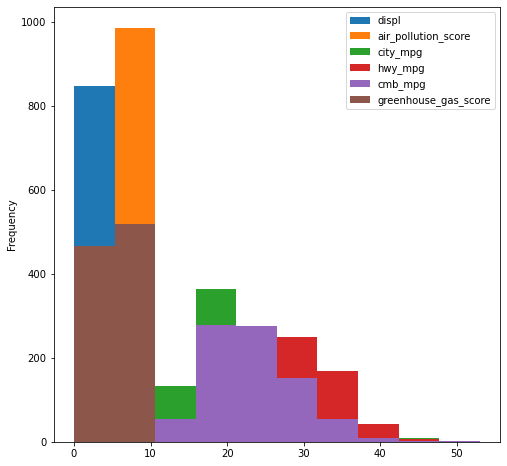

In [206]:
df_08.plot(kind = "hist",figsize=(8,8));

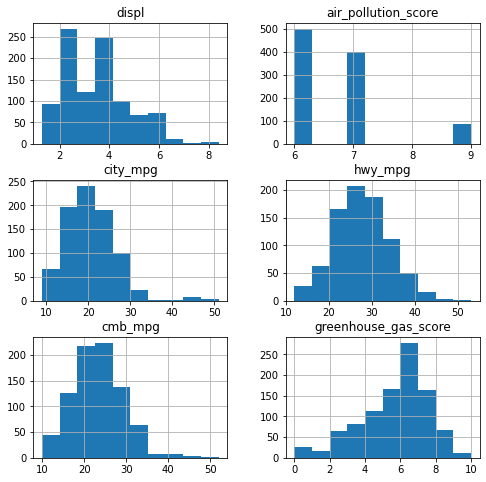

In [215]:
df_08.hist(figsize=(8,8)); # for numerical columns


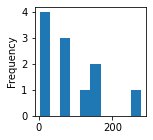

In [211]:
df_08['greenhouse_gas_score'].value_counts().plot(kind='hist',figsize = (2,2));

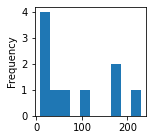

In [212]:
df_18['greenhouse_gas_score'].value_counts().plot(kind='hist',figsize = (2,2));

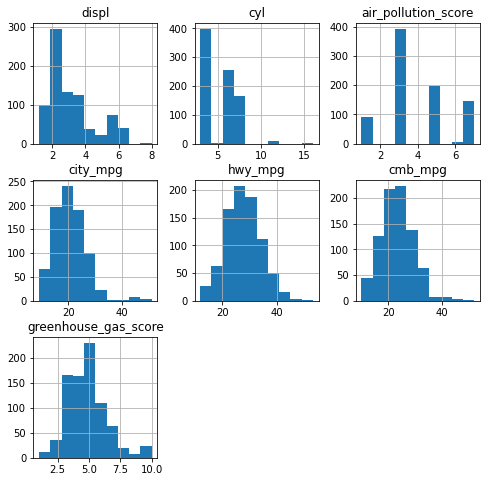

In [213]:
df_18.hist(figsize=(8,8)); # for numerical columns

<AxesSubplot:xlabel='displ', ylabel='cmb_mpg'>

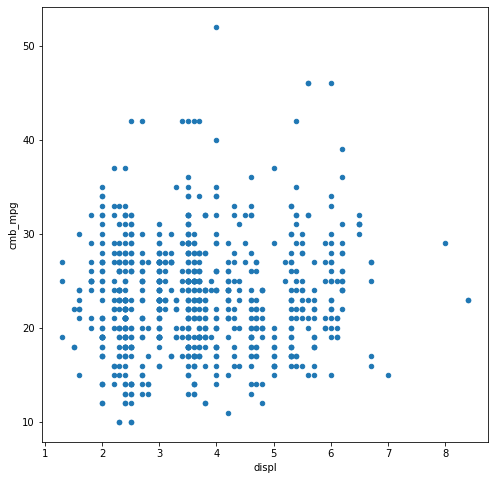

In [216]:
df_08.plot(x = 'displ' , y = 'cmb_mpg' , kind = 'scatter' , figsize=(8,8))

<AxesSubplot:xlabel='greenhouse_gas_score'>

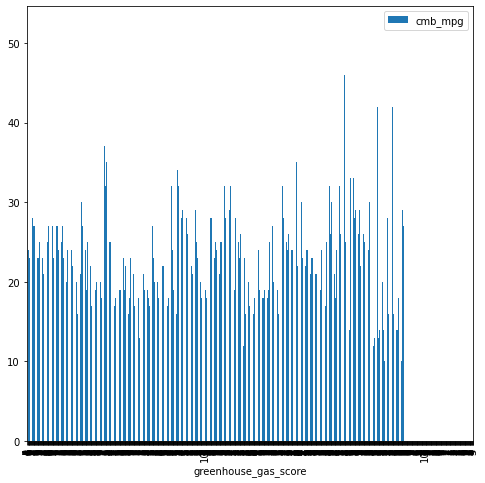

In [218]:

df_08.plot(x = 'greenhouse_gas_score' , y = 'cmb_mpg' , kind = 'bar' , figsize=(8,8))

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [219]:
df_08.fuel.value_counts()

Gasoline       984
ethanol/gas      1
CNG              1
Name: fuel, dtype: int64

In [220]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [225]:
df_08[(df_08['fuel'] == 'CNG') & (df_08['fuel'] == 'ethanol')]['model'].nunique()

0

In [229]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

1

In [227]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

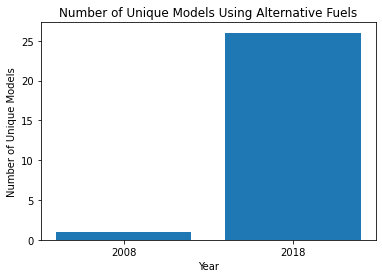

In [230]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

In [231]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [232]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.002652519893899204, 0.07282913165266107)

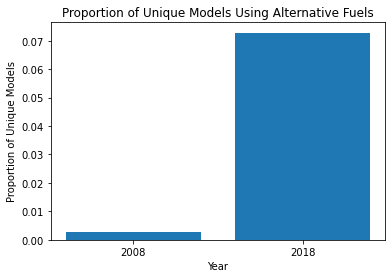

In [233]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

In [234]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              23.390947
large car        24.500000
midsize car      22.637097
minivan          20.933333
pickup           23.957746
small car        23.158088
station wagon    23.625000
van              20.619048
Name: cmb_mpg, dtype: float64

In [235]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          22.670455
midsize car        26.905797
minivan            20.800000
pickup             18.089744
small SUV          23.583333
small car          24.375439
special purpose    18.500000
standard SUV       17.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [236]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car         -1.829545
midsize car        4.268700
minivan           -0.133333
pickup            -5.868003
small SUV               NaN
small car          1.217350
special purpose         NaN
standard SUV            NaN
station wagon      3.904412
van                     NaN
Name: cmb_mpg, dtype: float64

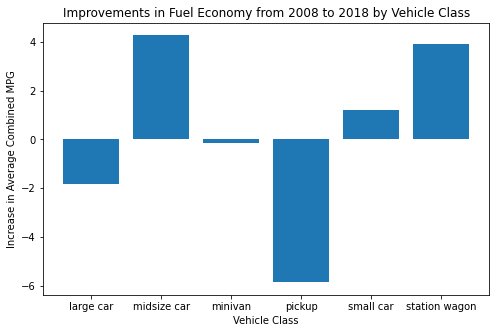

In [242]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

## Merging Datasets

In [243]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [244]:
# rename 2008 columns
df_08.rename(columns = lambda x:x[:10]+'_2008' , inplace = True)

In [245]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7.0,20.0,28.0,23.0,4,no
1,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7.0,19.0,27.0,22.0,5,no
2,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7.0,23.0,33.0,27.0,5,no
3,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7.0,20.0,32.0,24.0,6,yes
4,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7.0,21.0,30.0,24.0,6,yes


In [246]:
df_combined = df_08.merge(df_18,left_on = "model_2008",right_on="model",how="inner")

In [248]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7.0,19.0,27.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7.0,19.0,27.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,(4 cyl),Man-6,2WD,Gasoline,station wagon,7.0,24.0,33.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,(4 cyl),Man-6,2WD,Gasoline,station wagon,7.0,24.0,33.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,(4 cyl),Auto-S6,2WD,Gasoline,station wagon,7.0,27.0,37.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [249]:
df_combined.to_csv('combined_dataset.csv', index=False)

###  Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

#### 1. Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model¶

In [250]:
# load dataset
import pandas as pd
df = pd.read_csv('combined_dataset.csv')

In [252]:
df.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'veh_class_2008', 'air_pollut_2008', 'city_mpg_2008',
       'hwy_mpg_2008', 'cmb_mpg_2008', 'greenhouse_2008', 'smartway_2008',
       'model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [258]:
model_mpg = df.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [259]:
model_mpg

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,22.000000,22.500000
AUDI A3,28.333333,28.000000
AUDI A4,27.250000,27.000000
AUDI A6,22.666667,25.666667
AUDI A8 L,21.500000,22.000000
...,...,...
TOYOTA Yaris,NaN,32.500000
VOLKSWAGEN Jetta,NaN,30.000000
VOLKSWAGEN Passat,NaN,29.000000


In [260]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [261]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,22.000000,22.500000,0.500000
AUDI A3,28.333333,28.000000,-0.333333
AUDI A4,27.250000,27.000000,-0.250000
AUDI A6,22.666667,25.666667,3.000000
AUDI A8 L,21.500000,22.000000,0.500000


### 3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [262]:
max_change = model_mpg['mpg_change'].max()
max_change

14.000000000000004

In [263]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
HONDA Fit,19.333333,33.333333,14.0
